In [43]:
#imports section
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [44]:
#number of points in the genrated dataset
points_n = 200
clusters_n = 3
iteration_n = 100

In [45]:
#generate random data points with a uniform distribution and assign them to a 2D tensor constant. 
#Then, randomly choose initial centroids from the set of data points. 
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

In [46]:
#For the next step,to do element-wise subtraction of points and centroids that are 2D tensors. 
#Because the tensors have different shape,expand points and centroids into 3 dimensions, which allows to use 
#the broadcasting feature of subtraction operation
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

In [47]:
# calculate the distances between points and centroids and determine the cluster assignments
distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

In [48]:
#compare each cluster with a cluster assignments vector, get points assigned to each cluster, and calculate 
#mean values. These mean values are refined centroids, so update the centroids variable with the new values.
means = []
for c in np.arange(clusters_n):
    means.append(tf.reduce_mean(
        tf.gather(points,
                  tf.reshape(
                      tf.where(
                          tf.equal(assignments, c)
                      ), [1, -1])
                  ), reduction_indices=[1]))

new_centroids = tf.concat(means , 0)

In [49]:
update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

In [50]:
#For each iteration,update the centroids and return their values along with the cluster assignments values
with tf.Session() as sess:
    sess.run(init)
    for step in np.arange(iteration_n):
        [_, centroid_values, points_values, assignment_values] = sess.run(
            [update_centroids, centroids, points, assignments])

    print("centroids" + "\n", centroid_values)

centroids
 [[ 2.87059573  2.48547849]
 [ 3.02491871  7.67087862]
 [ 7.8115082   5.09308779]]


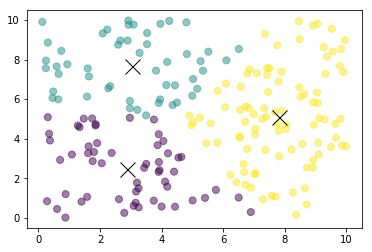

In [51]:
plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()